In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
dataset = pd.read_csv("/content/Churn_Modelling_ HasCrCard.csv")

In [ ]:
dataset.head()


,RowNumber,CustomerId,First Name,Second Name,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,HasCrCard
0,1,15634602,Ella,Elsa,619,Pahang,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hiza,Hiza,608,Johor,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Mila,Fiza,502,Kelantan,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Tia,Salma,699,Johor,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Nisha,Rose,850,Selangor,Female,43,2,125510.82,1,1,79084.10,1


In [ ]:
dataset

,RowNumber,CustomerId,First Name,Second Name,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,HasCrCard
0,1,15634602,Ella,Elsa,619,Pahang,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hiza,Hiza,608,Johor,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Mila,Fiza,502,Kelantan,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Tia,Salma,699,Johor,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Nisha,Rose,850,Selangor,Female,43,2,125510.82,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Syamsul,Ramli,771,Selangor,Male,39,5,0.00,2,0,96270.64,1
9996,9997,15569892,Zaid,Umar,516,Selangor,Male,35,10,57369.61,1,1,101699.77,1
9997,9998,15584532,Dwi,Zara,709,Pahang,Female,36,7,0.00,1,1,42085.58,0
9998,9999,15682355,Sadiq,Ramzi,772,Selangor,Male,42,3,75075.31,2,0,92888.52,1


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,HasCrCard
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.70550
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.45584
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.00000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.00000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,1.00000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,1.00000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.00000


In [ ]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
First Name         0
Second Name        0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
HasCrCard          0
dtype: int64

In [ ]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
First Name         False
Second Name        False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
IsActiveMember     False
EstimatedSalary    False
HasCrCard          False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Geography'] = le.fit_transform(dataset['Geography'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [ ]:
dataset

,RowNumber,CustomerId,First Name,Second Name,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,HasCrCard
0,1,15634602,Ella,Elsa,619,2,0,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hiza,Hiza,608,0,0,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Mila,Fiza,502,1,0,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Tia,Salma,699,0,0,39,1,0.00,2,0,93826.63,0
4,5,15737888,Nisha,Rose,850,3,0,43,2,125510.82,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Syamsul,Ramli,771,3,1,39,5,0.00,2,0,96270.64,1
9996,9997,15569892,Zaid,Umar,516,3,1,35,10,57369.61,1,1,101699.77,1
9997,9998,15584532,Dwi,Zara,709,2,0,36,7,0.00,1,1,42085.58,0
9998,9999,15682355,Sadiq,Ramzi,772,3,1,42,3,75075.31,2,0,92888.52,1


In [ ]:
dataset.corr()

<ipython-input-188-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,HasCrCard
RowNumber,1.000000,0.004202,0.005840,0.019015,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.012044,-0.005988,0.000599
CustomerId,0.004202,1.000000,0.005308,-0.011984,-0.002641,0.009497,-0.014883,-0.012419,0.016972,0.001665,0.015271,-0.014025
CreditScore,0.005840,0.005308,1.000000,-0.001037,-0.002857,-0.003965,0.000842,0.006268,0.012238,0.025651,-0.001384,-0.005458
Geography,0.019015,-0.011984,-0.001037,1.000000,0.006679,-0.002079,0.020226,-0.000268,-0.012280,0.006501,-0.005537,0.004130
Gender,0.018196,-0.002641,-0.002857,0.006679,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.022544,-0.008112,0.005766
Age,0.000783,0.009497,-0.003965,-0.002079,-0.027544,1.000000,-0.009997,0.028308,-0.030680,0.085472,-0.007201,-0.011721
Tenure,-0.006495,-0.014883,0.000842,0.020226,0.014733,-0.009997,1.000000,-0.012254,0.013444,-0.028362,0.007784,0.022583
Balance,-0.009067,-0.012419,0.006268,-0.000268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.010084,0.012797,-0.014858
NumOfProducts,0.007246,0.016972,0.012238,-0.012280,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.009612,0.014204,0.003183
IsActiveMember,0.012044,0.001665,0.025651,0.006501,0.022544,0.085472,-0.028362,-0.010084,0.009612,1.000000,-0.011421,-0.011866


<ipython-input-189-67056be374cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True,cmap='Reds')


<Axes: >

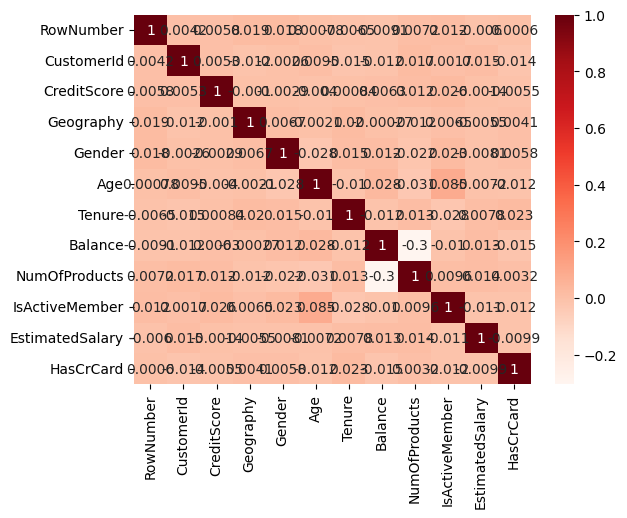

In [ ]:
sns.heatmap(dataset.corr(), annot=True,cmap='Reds')

In [ ]:
x = dataset.iloc[:,4:13]
y =  dataset.iloc[:,13]

In [ ]:
x = dataset.iloc[:,4:13].values
y =  dataset.iloc[:,13] .values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,1:2]).toarray()
x = np.delete(x,1,axis = 1)
x = np.concatenate((z,x),axis = 1)

In [ ]:
x.shape

(10000, 12)

In [ ]:
x  = x[:,1:]

In [ ]:
x.shape

(10000, 11)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
y_test.shape

(2000,)

In [ ]:
x_train

array([[     0.  ,      0.  ,      1.  , ...,      2.  ,      0.  ,
        163830.64],
       [     0.  ,      1.  ,      0.  , ...,      1.  ,      1.  ,
         57098.  ],
       [     0.  ,      0.  ,      0.  , ...,      1.  ,      0.  ,
        185630.76],
       ...,
       [     0.  ,      0.  ,      1.  , ...,      2.  ,      0.  ,
        181429.87],
       [     1.  ,      0.  ,      0.  , ...,      2.  ,      1.  ,
        148750.16],
       [     0.  ,      0.  ,      0.  , ...,      1.  ,      0.  ,
        118855.26]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#importing the model & layer
import keras
from keras.models import Sequential
from keras.layers import Dense
classifer = Sequential()
classifer.add(Dense(units = 11,kernel_initializer = 'uniform', activation = 'relu'))
classifer.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifer.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
classifer.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifer.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
classifer.fit(x_train,y_train, batch_size = 16, epochs = 200)

Epoch 1/200
500/500 [==============================] - 2s 2ms/step - loss: 0.6300 - accuracy: 0.7078
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6045 - accuracy: 0.7078
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6041 - accuracy: 0.7078
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.7078
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6036 - accuracy: 0.7078
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6036 - accuracy: 0.7078
Epoch 7/200
500/500 [==============================] - 1s 3ms/step - loss: 0.6035 - accuracy: 0.7078
Epoch 8/200
500/500 [==============================] - 1s 3ms/step - loss: 0.6034 - accuracy: 0.7078
Epoch 9/200
500/500 [==============================] - 2s 3ms/step - loss: 0.6034 - accuracy: 0.7078
Epoch 10/200
500/500 [==============================] - 2s 5ms/step - loss: 0.6032 - accura

In [ ]:
classifer.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (16, 11)                  132       
                                                                 
 dense_33 (Dense)            (16, 6)                   72        
                                                                 
 dense_34 (Dense)            (16, 3)                   21        
                                                                 
 dense_35 (Dense)            (16, 1)                   4         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = classifer.predict(x_test)
y_pred = (y_pred>0.5)
y_pred[60]

63/63 [==============================] - 0s 1ms/step


array([ True])

In [ ]:
y_test[60]

1

In [ ]:
dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

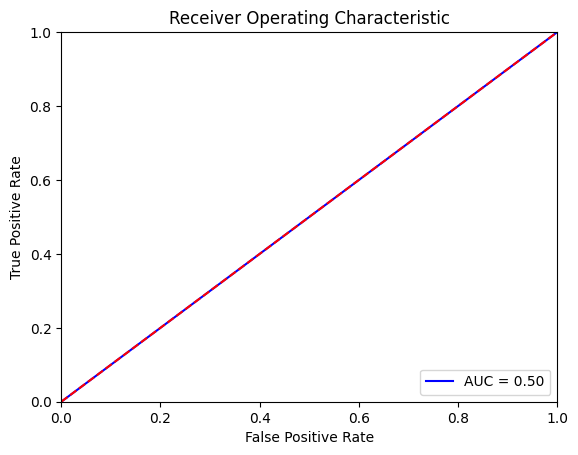

Accuracy: 0.6965
Precision: 0.6965
Recall: 1.0
F1 Score: 0.8211022693781315
Confusion Matrix:
 [[   0  607]
 [   0 1393]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       607
           1       0.70      1.00      0.82      1393

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.57      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Performance Metrics:
Mean Squared Error (MSE): 0.38800000000000046
Mean Absolute Error (MAE): 0.3880000000000005
R-squared: -0.8354895210342155


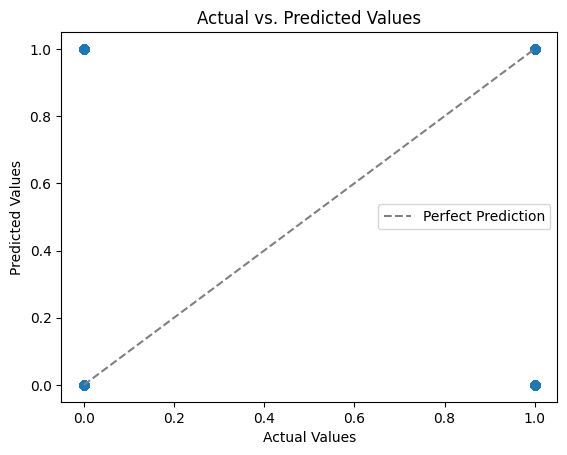

In [ ]:

# Evaluate performance metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display performance metrics
print("Performance Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

# Visualize results
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


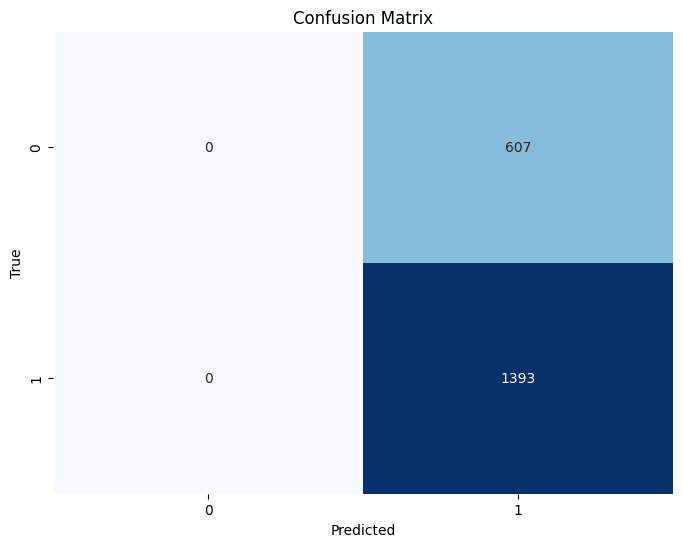

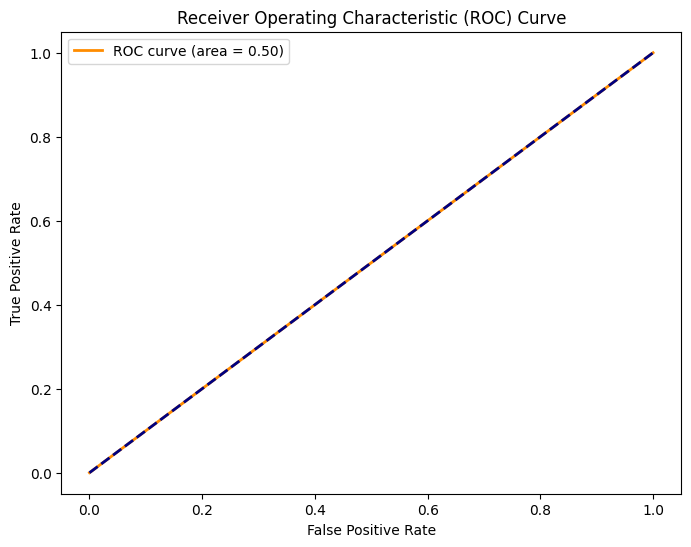

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you have y_pred and y_test from your model predictions
# Assuming binary classification, adjust accordingly for multiclass

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
